<a href="https://colab.research.google.com/github/CateSlaven/ClassActivity/blob/main/projectcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from pycaret.regression import *
from pycaret.classification import *



ModuleNotFoundError: No module named 'pycaret'

In [ ]:
crime_data = pd.read_csv("C:/Users/scfai/OneDrive/Documents/3601Project/crimedata2.csv", encoding='ISO-8859-1')

crime_data.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79


In [ ]:
# Household size and family-related variables
household_df = crime_data[['householdsize', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PersPerFam']]
household_df.head()


,householdsize,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PersPerFam
0,3.10,91.43,90.17,95.78,95.81,3.22
1,2.82,86.91,85.33,96.82,86.46,3.11
2,2.43,78.54,78.85,92.37,75.72,2.95
3,2.40,64.02,62.36,65.38,67.43,2.98
4,2.76,58.59,55.20,66.51,79.17,2.98


In [ ]:
# Violent crime-related variables
violent_crime_df = crime_data[['assaultPerPop', 'ViolentCrimesPerPop', 'murders', 'rapes', 'robberies', 'autoTheft']]
violent_crime_df.head()


,assaultPerPop,ViolentCrimesPerPop,murders,rapes,robberies,autoTheft
0,32.81,41.02,0,0,1,16
1,102.05,127.56,0,1,5,26
2,38.74,218.59,3,6,56,136
3,190.93,306.64,0,10,10,47
4,112.14,?,0,?,4,91


In [ ]:
# Socioeconomic factors
socioeconomic_df = crime_data[['medIncome', 'PctPopUnderPov', 'PctUnemployed', 'perCapInc', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore']]
socioeconomic_df.head()


,medIncome,PctPopUnderPov,PctUnemployed,perCapInc,PctLess9thGrade,PctNotHSGrad,PctBSorMore
0,75122,1.96,2.70,29711,5.81,9.90,48.18
1,47917,3.98,2.43,20148,5.61,13.72,29.89
2,35669,4.75,4.01,16946,2.80,9.09,30.13
3,20580,17.23,9.86,10810,11.05,33.68,10.81
4,17390,29.99,9.08,8483,12.15,23.06,25.28


In [ ]:
# Racial demographics and other community variables
demographics_df = crime_data[['racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'PopDens']]
demographics_df.head()


,racepctblack,racePctWhite,racePctAsian,racePctHisp,PopDens
0,1.37,91.78,6.50,1.88,1845.9
1,0.80,95.57,3.44,0.85,2186.7
2,0.74,94.33,3.43,2.35,2780.9
3,1.70,97.35,0.50,0.70,3217.7
4,0.53,89.16,1.17,0.52,974.2


In [ ]:
# Combine household, crime, and socioeconomic variables into one DataFrame for multivariate analysis
multivariate_df = crime_data[['householdsize', 'PctFam2Par', 'assaultPerPop', 'ViolentCrimesPerPop', 'medIncome', 'PctPopUnderPov', 'racepctblack', 'racePctWhite']]
multivariate_df.head()


,householdsize,PctFam2Par,assaultPerPop,ViolentCrimesPerPop,medIncome,PctPopUnderPov,racepctblack,racePctWhite
0,3.10,91.43,32.81,41.02,75122,1.96,1.37,91.78
1,2.82,86.91,102.05,127.56,47917,3.98,0.80,95.57
2,2.43,78.54,38.74,218.59,35669,4.75,0.74,94.33
3,2.40,64.02,190.93,306.64,20580,17.23,1.70,97.35
4,2.76,58.59,112.14,?,17390,29.99,0.53,89.16


In [ ]:
# Identify any non-numeric values in assaultPerPop
non_numeric = crime_data[~crime_data['assaultPerPop'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric)


               Êcommunityname state countyCode communityCode  fold  \
0     BerkeleyHeightstownship    NJ         39          5320     1   
1              Marpletownship    PA         45         47616     1   
2                  Tigardcity    OR          ?             ?     1   
3            Gloversvillecity    NY         35         29443     1   
4                 Bemidjicity    MN          7          5068     1   
...                       ...   ...        ...           ...   ...   
2210               Mercedcity    CA          ?             ?    10   
2211            Pinevillecity    LA          ?             ?    10   
2212              Yucaipacity    CA          ?             ?    10   
2213             Beevillecity    TX          ?             ?    10   
2214       WestSacramentocity    CA          ?             ?    10   

      population  householdsize  racepctblack  racePctWhite  racePctAsian  \
0          11980           3.10          1.37         91.78          6.50   
1    

In [ ]:
# Replace '?' with NaN
crime_data.replace('?', pd.NA, inplace=True)

# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['population', 'householdsize', 'racepctblack', 'racePctWhite',
                   'racePctAsian', 'assaultPerPop', 'ViolentCrimesPerPop', 'autoTheftPerPop',
                   'larcenies', 'arsons', 'nonViolPerPop']
for col in numeric_columns:
    crime_data[col] = pd.to_numeric(crime_data[col], errors='coerce')

# Check for any remaining non-numeric values
for column in numeric_columns:
    non_numeric = crime_data[column].isna().sum()
    print(f"NaN values in column '{column}': {non_numeric}")

# Handle missing values
crime_data.dropna(subset=numeric_columns, inplace=True)

NaN values in column 'population': 0
NaN values in column 'householdsize': 0
NaN values in column 'racepctblack': 0
NaN values in column 'racePctWhite': 0
NaN values in column 'racePctAsian': 0
NaN values in column 'assaultPerPop': 13
NaN values in column 'ViolentCrimesPerPop': 221
NaN values in column 'autoTheftPerPop': 3
NaN values in column 'larcenies': 3
NaN values in column 'arsons': 91
NaN values in column 'nonViolPerPop': 97


In [ ]:
# Drop rows with NaN values in specific columns
critical_columns = ['assaultPerPop', 'ViolentCrimesPerPop', 'autoTheftPerPop',
                    'larcenies', 'arsons', 'nonViolPerPop']
crime_data.dropna(subset=critical_columns, inplace=True)

In [ ]:
crime_data['assaultCategory'] = pd.cut(
    crime_data['assaultPerPop'],
    bins=[-1, 0, 10, 20, float('inf')],
    labels=['No Assaults', 'Low', 'Medium', 'High']

In [ ]:
# Define features and target variable
X = crime_data[['PctFam2Par', 'householdsize', 'PctPopUnderPov', 'PctUnemployed', 'medIncome', 'PopDens']]
y = crime_data['assaultCategory']  # target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Initialize and fit the model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Predict on the test set
y_pred = baseline_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

              precision    recall  f1-score   support

        High       0.96      1.00      0.98       366
         Low       0.00      0.00      0.00         4
      Medium       0.00      0.00      0.00         8
 No Assaults       0.00      0.00      0.00         3

    accuracy                           0.96       381
   macro avg       0.24      0.25      0.24       381
weighted avg       0.92      0.96      0.94       381

Accuracy: 0.9606299212598425


In [ ]:
# Cross-validation scores
cv_scores = cross_val_score(baseline_model, X, y, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean()}')

Cross-validation scores: [0.96062992 0.96062992 0.96052632 0.96052632 0.96052632]
Mean CV score: 0.9605677579776211


racepctblack
0.00      242.415
0.01      108.490
0.03       44.640
0.04      144.900
0.05      188.130
           ...   
74.45    1874.950
80.57    2154.960
88.99     929.910
89.95    2941.620
96.67    1282.680
Name: ViolentCrimesPerPop, Length: 1065, dtype: float64


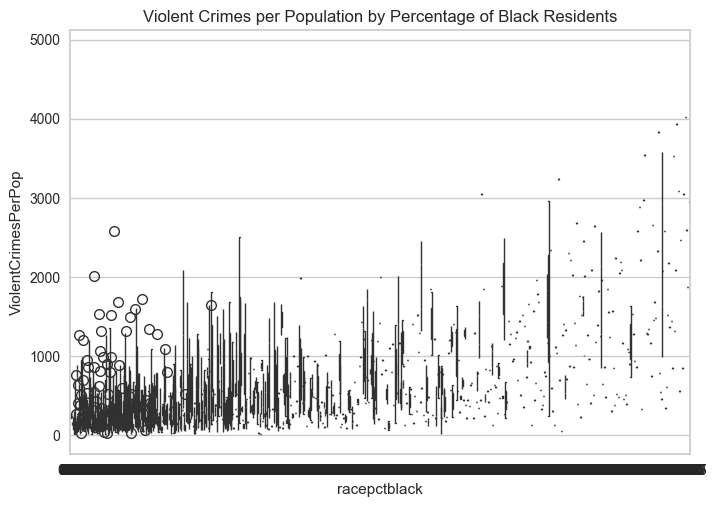

In [ ]:
#Group by race percentages and calculate mean ViolentCrimesPerPop
race_groups = crime_data.groupby('racepctblack')['ViolentCrimesPerPop'].mean()
print(race_groups)


sns.boxplot(x='racepctblack', y='ViolentCrimesPerPop', data=crime_data)
plt.title('Violent Crimes per Population by Percentage of Black Residents')
plt.show()

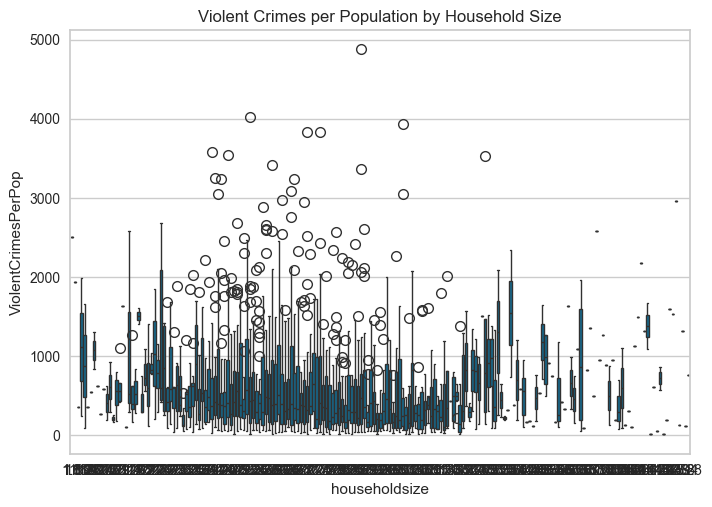

In [ ]:
sns.boxplot(x='householdsize', y='ViolentCrimesPerPop', data=crime_data)
plt.title('Violent Crimes per Population by Household Size')
plt.show()

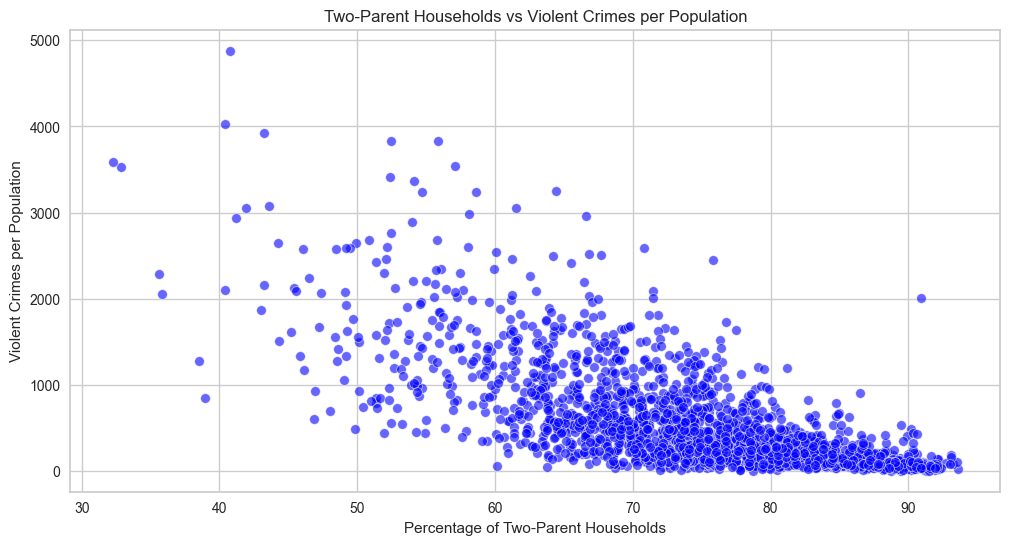

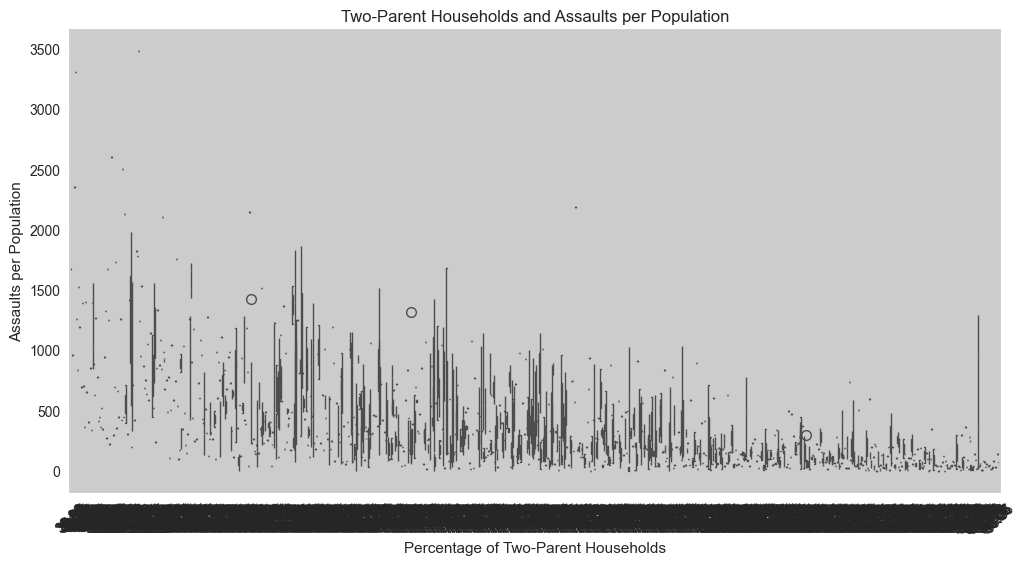

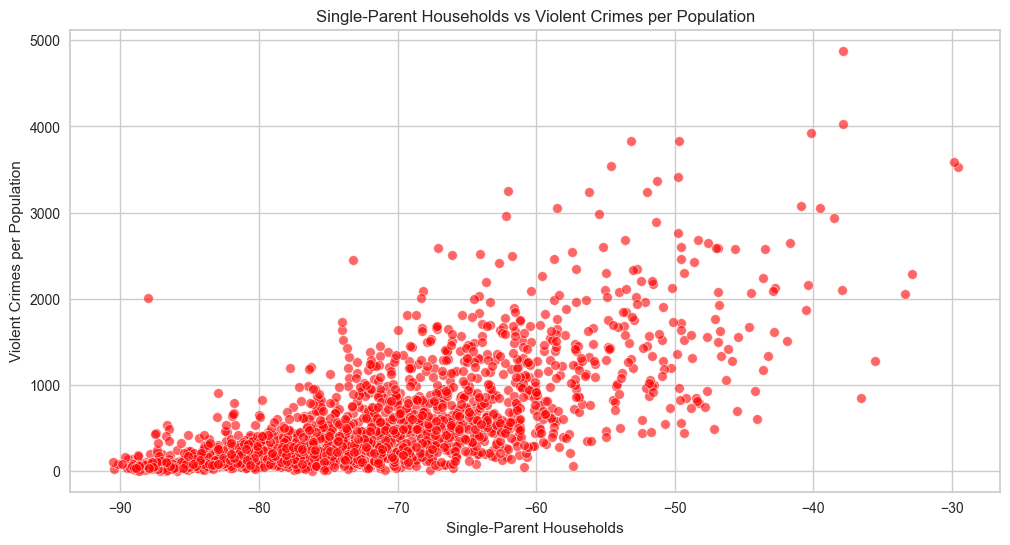

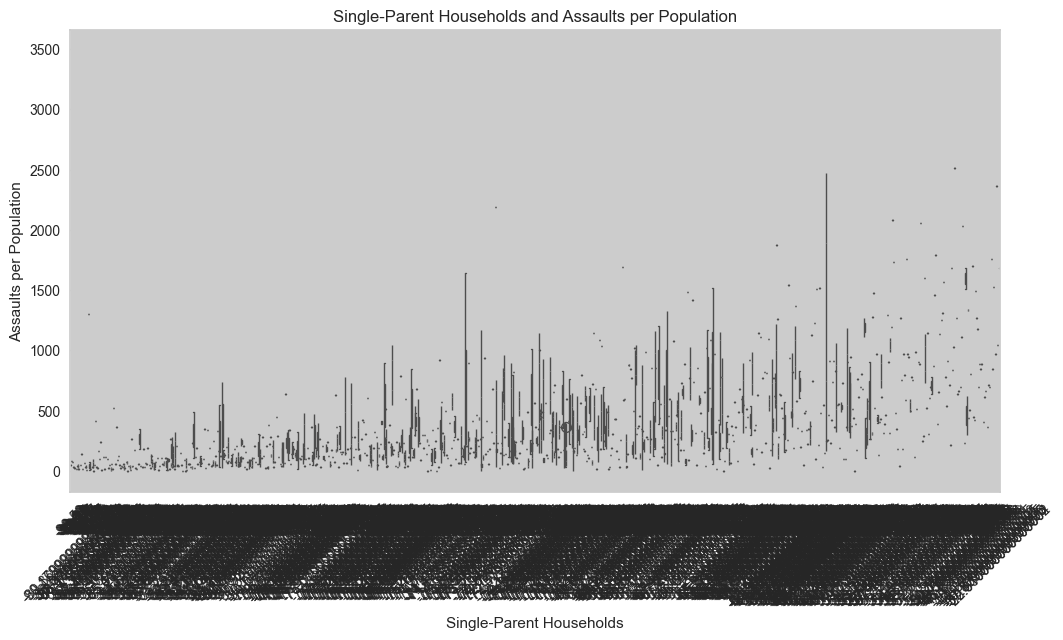

In [ ]:

crime_data['SingleParent'] = crime_data['householdsize'] - crime_data['PctFam2Par']

# 1. Plot for Two-Parent Households
plt.figure(figsize=(12, 6))

# Scatter plot for Two-Parent Households vs Violent Crimes
sns.scatterplot(data=crime_data, x='PctFam2Par', y='ViolentCrimesPerPop', color='blue', alpha=0.6)
plt.title('Two-Parent Households vs Violent Crimes per Population')
plt.xlabel('Percentage of Two-Parent Households')
plt.ylabel('Violent Crimes per Population')
plt.grid(True)
plt.show()

# Box plot for Two-Parent Households and Assaults
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_data, x='PctFam2Par', y='assaultPerPop', color='blue')
plt.title('Two-Parent Households and Assaults per Population')
plt.xlabel('Percentage of Two-Parent Households')
plt.ylabel('Assaults per Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot for Single-Parent Households
plt.figure(figsize=(12, 6))

# Scatter plot for Single-Parent Households vs Violent Crimes
sns.scatterplot(data=crime_data, x='SingleParent', y='ViolentCrimesPerPop', color='red', alpha=0.6)
plt.title('Single-Parent Households vs Violent Crimes per Population')
plt.xlabel('Single-Parent Households')
plt.ylabel('Violent Crimes per Population')
plt.grid(True)
plt.show()

# Box plot for Single-Parent Households and Assaults
plt.figure(figsize=(12, 6))
sns.boxplot(data=crime_data, x='SingleParent', y='assaultPerPop', color='red')
plt.title('Single-Parent Households and Assaults per Population')
plt.xlabel('Single-Parent Households')
plt.ylabel('Assaults per Population')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()